## RMWSPy

This is a compilation of basic examples for the RMWSPy package for conditional spatial simulation. 

In [1]:
# open an interactive console that one can use to check variables 
# or perform calculations interactively and import modules
%qtconsole 
import os
import sys
import numpy as np
import scipy.stats as st
import scipy.spatial as sp
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
try:
    from random_mixing_whittaker_shannon import RMWSCondSim
except:
    fpth = os.path.abspath(os.path.join('rmwspy'))
    sys.path.append(fpth)
    from random_mixing_whittaker_shannon import RMWSCondSim

# also let's define a random seed to ensure repeatability
np.random.seed(123)

No non-linear object defined!
Linear simulation only!


### Equality constraints
Let's start with the most basic case where we want to simulate spatial random fields conditioned on a covariance model and on linear (equality '=') observations. As RMWS works in standard normal space we (for now) assume that these obervations are sampled from a standard normal distribution. Further, we assume that we know the covariance model.

In [2]:
# define field size
domainsize = (100, 100)
# define how many conditional realizations we want to simulate
nfields = 20 
# spatial covariance which we assume to know from our observations
# the covariance model is defined as: Sill Model(Range) 
# and it can be a linear combination of multiple models
# available covariance models are: Nug (Nugget), Exp (Exponential), 
# Sph (Spherical), Gau (Gaussian)
covariancemodel = '0.01 Nug(0.0) + 0.99 Exp(7.2)' 

# define equality observations
# observation point coordinates
cp = np.array([[23, 37], [26, 34], [11, 89], [69, 51], [88, 39]]) 
# observation values in standard normal space 
cv = np.array([-1.1, -1.8, 2.8, 0.2, 1.9]) 
    
# use random mixing for the conditional simulation
# initialize CondSim
rm = RMWSCondSim(domainsize = domainsize,
                 covmod = covariancemodel,
                 nFields = nfields,
                 cp = cp,
                 cv = cv)

# run simulations
rm()

# these are the simulated conditional fields
condfields = rm.finalFields


 Simulation terminated!


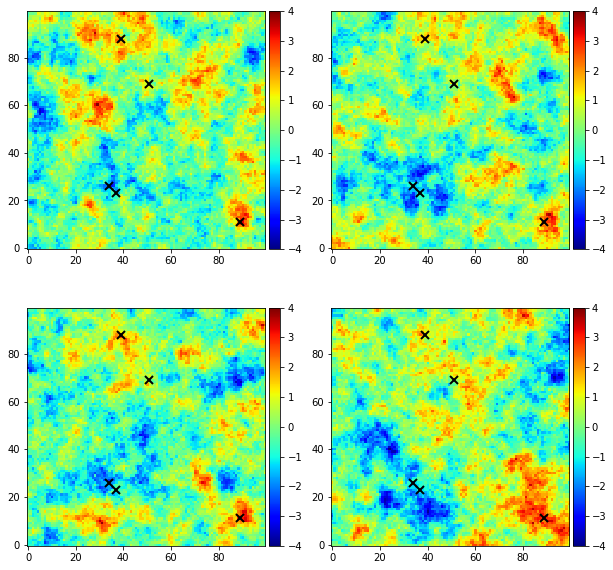

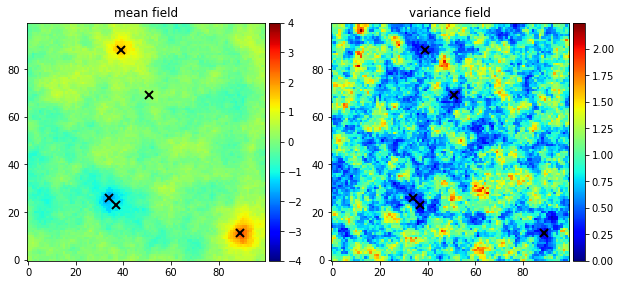

In [3]:
# let's have a look at four randomly selected fields 
rn = np.random.randint(0,nfields,4)

plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(2, 2, i+1)
    ax = plt.gca()    
    im = ax.imshow(condfields[rn[i]],
               origin='lower', interpolation='nearest', 
               cmap='jet', vmin=-4, vmax=4)
    ax.plot(cp[:,1], cp[:,0], 'x', c='black', mew=2, ms=8)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
plt.show()

# plot the mean field (average over all the 20 simulated fields,
# if one simulates enough fields the mean will 
# be similar to an interpolation)
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
ax = plt.gca()
im = ax.imshow(np.mean(condfields,axis=0),
           origin='lower', interpolation='nearest', 
           cmap='jet', vmin=-4, vmax=4)
ax.plot(cp[:,1], cp[:,0], 'x', c='black', mew=2, ms=8)
plt.title('mean field')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

# plot the variance field (variance over all 20)
plt.subplot(1, 2, 2)
ax = plt.gca()
im = ax.imshow(np.var(condfields,axis=0),
           origin='lower', interpolation='nearest', 
           cmap='jet')
ax.plot(cp[:,1], cp[:,0], 'x', c='black', mew=2, ms=8)
plt.title('variance field')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.show()

In [4]:
# but one can of course also check the actual simulated values 
# at the cp locations across these four fields;
# NOTE that minor deviations from the actual values are due 
# to numerical rounding issues
for i, c in enumerate(cp):
    print('should be:', cv[i])
    print('is:', condfields[rn, c[0], c[1]])

should be: -1.1
is: [-1.09999997 -1.10000007 -1.09999987 -1.10000004]
should be: -1.8
is: [-1.79999999 -1.79999999 -1.79999999 -1.80000005]
should be: 2.8
is: [2.79999997 2.80000003 2.80000003 2.79999998]
should be: 0.2
is: [0.20000001 0.2000001  0.2000001  0.2       ]
should be: 1.9
is: [1.90000008 1.90000006 1.90000006 1.90000002]


### Inequality constraints
Sweet, that seems to work. Now let's try to additionally include some inequality (less/equal '<=') point constraints. These can, for example, arise from measurements below detection limits. Apart from the inequalities we keep the same setup as in the first example. Note that RMWS can also handle greater equal ('>=') constraints (keywords: ge_cp and ge_cv).

In [5]:
# define inequality (<=) observations
# <= observation coordinates
cp_leq = np.array([[29,39], [81,46]]) 
# <= observation values (upper bounds) in standard normal space
cv_leq = np.array([-2.1, 2.2])  
    
# add the additional variable for the inequalities
rm = RMWSCondSim(domainsize = domainsize,
                 covmod = covariancemodel,
                 nFields = nfields,
                 cp = cp,
                 cv = cv,
                 le_cp = cp_leq,
                 le_cv = cv_leq)
# run simulations
rm()

# these are the conditional fields
condfields = rm.finalFields


 Simulation terminated!


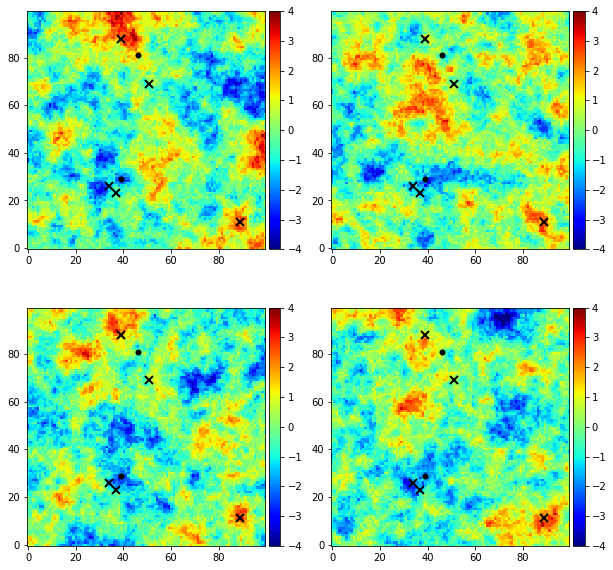

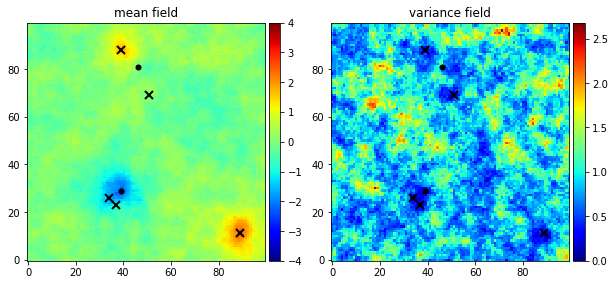

In [6]:
# let's again have a look at four fields
rn = np.random.randint(0,nfields,4)

plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(2, 2, i+1)
    ax = plt.gca()    
    im = ax.imshow(condfields[rn[i]],
               origin='lower', interpolation='nearest', 
               cmap='jet', vmin=-4, vmax=4)
    ax.plot(cp[:,1], cp[:,0], 'x', c='black', mew=2, ms=8)
    ax.plot(cp_leq[:,1], cp_leq[:,0], '.', c='black', mew=2, ms=8)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
plt.show()

# plot the mean field 
plt.figure(figsize=(10, 10))
plt.subplot(1,2,1)
ax = plt.gca()
im = ax.imshow(np.mean(condfields,axis=0),
           origin='lower', interpolation='nearest', 
           cmap='jet', vmin=-4, vmax=4)
ax.plot(cp[:,1], cp[:,0], 'x', c='black', mew=2, ms=8)
ax.plot(cp_leq[:,1], cp_leq[:,0], '.', c='black', mew=2, ms=8)
plt.title('mean field')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

# plot the variance field
plt.subplot(1,2,2)
ax = plt.gca()
im = ax.imshow(np.var(condfields,axis=0),
           origin='lower', interpolation='nearest', 
           cmap='jet')
ax.plot(cp[:,1], cp[:,0], 'x', c='black', mew=2, ms=8)
ax.plot(cp_leq[:,1], cp_leq[:,0], '.', c='black', mew=2, ms=8)
plt.title('variance field')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.show()

In [7]:
# check the conditioning point values again
for i, c in enumerate(cp):
    print('should be:', cv[i])
    print('is:', condfields[rn, c[0], c[1]])
    
# also check the values at the <= constraints
print('\n')
for i, c in enumerate(cp_leq):
    print('should be less or equal to:', cv_leq[i])
    print('is:', condfields[rn, c[0], c[1]])

should be: -1.1
is: [-1.09999983 -1.0999999  -1.10000006 -1.10000008]
should be: -1.8
is: [-1.79999991 -1.79999996 -1.80000013 -1.80000006]
should be: 2.8
is: [2.80000006 2.7999999  2.79999989 2.80000014]
should be: 0.2
is: [0.19999991 0.2        0.20000002 0.1999999 ]
should be: 1.9
is: [1.90000009 1.89999995 1.90000001 1.90000011]


should be less or equal to: -2.1
is: [-2.70938493 -2.25577523 -2.53255948 -2.26622385]
should be less or equal to: 2.2
is: [ 1.39788726 -0.34155884 -0.18034672  0.40683568]


### Simulations in actual data space
Until now we have assumed that all our observations are in standard normal. However, this is rather seldom the case in real world data. Now we assume that we have observed data in a different space and that we have 'fitted' a marginal distribution to this data. For simplicity we don't actually fit a distribution here but we assume that our observations follow an exponential distribution with $\lambda=1$. As RMWS works in standard normal space though we need to transform these observations from their original data space into standard normal space. After the simulation we then back-transform from standard normal to data space.

In [8]:
# define field size
domainsize = (100, 100)
# how many conditional realizations do we want to simulate
nfields = 20 
# spatial covariance which we assume to know from our observations
covariancemodel = '0.01 Nug(0.0) + 0.99 Exp(17.2)' 

# define equality observations
# observation point coordinates
cp = np.array([[23,37], [26, 34], [11,89], [69,51], [88,39]]) 
# observation values in actual data space
cv = np.array([0.2, 0.9, 7.1, 5.5, 2.3]) 
# transform these values into standard normal space for the simulation
# we assume that we have 'fitted' a marginal distribution to our observations
# here it is an exponential distribution with lambda=1
cvn = st.norm.ppf(st.expon.cdf(cv))
    
# use random mixing for the conditional simulation
# initialize CondSim
rm = RMWSCondSim(domainsize = domainsize,
                 covmod = covariancemodel,
                 nFields = nfields,
                 cp = cp,
                 cv = cvn)

# run simulations
rm()

# these are the simulated conditional fields (in standard normal)
condfields = rm.finalFields
# thus we need to back-transform to their original data space 
# using the inverse distribution function
condfields_ds = st.expon.ppf(st.norm.cdf(rm.finalFields))


 Simulation terminated!


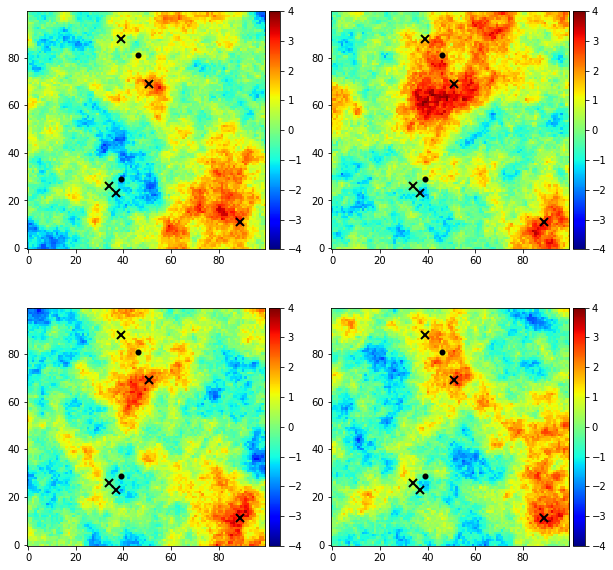

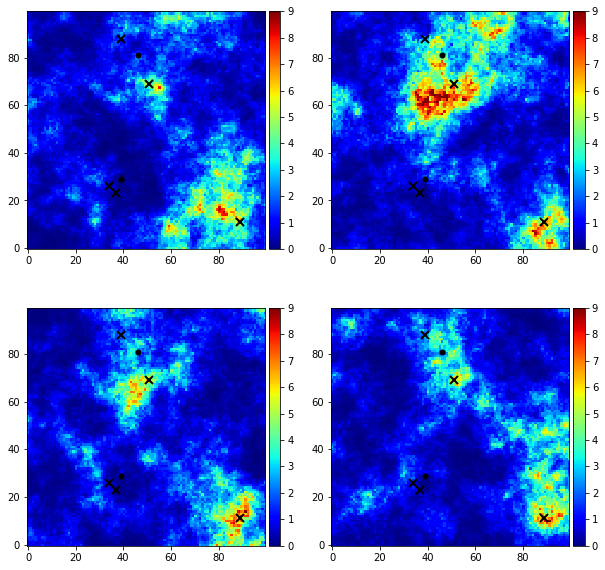

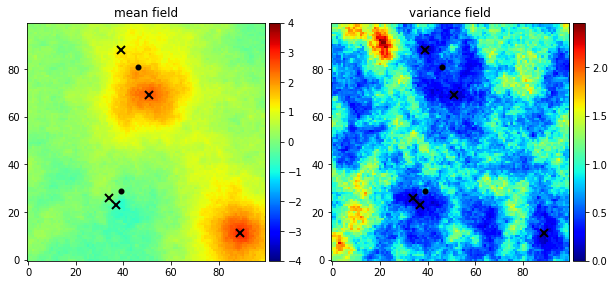

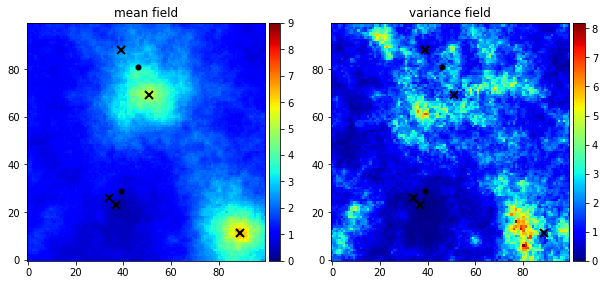

In [9]:
# now we can have a look at some of the fields in standard normal space 
# as well as in data space;
# in order to plot the same ones we determine the random numbers first
rn = np.random.randint(0,nfields,4)

plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(2, 2, i+1)
    ax = plt.gca()    
    im = ax.imshow(condfields[rn[i]],
               origin='lower', interpolation='nearest', 
               cmap='jet', vmin=-4, vmax=4)
    ax.plot(cp[:,1], cp[:,0], 'x', c='black', mew=2, ms=8)
    ax.plot(cp_leq[:,1], cp_leq[:,0], '.', c='black', mew=2, ms=8)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
plt.show()

plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(2, 2, i+1)
    ax = plt.gca()    
    im = ax.imshow(condfields_ds[rn[i]],
               origin='lower', interpolation='nearest', 
               cmap='jet', vmin=0, vmax=9)
    ax.plot(cp[:,1], cp[:,0], 'x', c='black', mew=2, ms=8)
    ax.plot(cp_leq[:,1], cp_leq[:,0], '.', c='black', mew=2, ms=8)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
plt.show()

# plot the mean field 
plt.figure(figsize=(10, 10))
plt.subplot(1,2,1)
ax = plt.gca()
im = ax.imshow(np.mean(condfields,axis=0),
           origin='lower', interpolation='nearest', 
           cmap='jet', vmin=-4, vmax=4)
ax.plot(cp[:,1], cp[:,0], 'x', c='black', mew=2, ms=8)
ax.plot(cp_leq[:,1], cp_leq[:,0], '.', c='black', mew=2, ms=8)
plt.title('mean field')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

# plot the variance field
plt.subplot(1,2,2)
ax = plt.gca()
im = ax.imshow(np.var(condfields,axis=0),
           origin='lower', interpolation='nearest', 
           cmap='jet')
ax.plot(cp[:,1], cp[:,0], 'x', c='black', mew=2, ms=8)
ax.plot(cp_leq[:,1], cp_leq[:,0], '.', c='black', mew=2, ms=8)
plt.title('variance field')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.show()

# plot the mean field in data space
plt.figure(figsize=(10, 10))
plt.subplot(1,2,1)
ax = plt.gca()
im = ax.imshow(np.mean(condfields_ds,axis=0),
           origin='lower', interpolation='nearest', 
           cmap='jet', vmin=0, vmax=9)
ax.plot(cp[:,1], cp[:,0], 'x', c='black', mew=2, ms=8)
ax.plot(cp_leq[:,1], cp_leq[:,0], '.', c='black', mew=2, ms=8)
plt.title('mean field')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

# plot the variance field in data space
plt.subplot(1,2,2)
ax = plt.gca()
im = ax.imshow(np.var(condfields_ds,axis=0),
           origin='lower', interpolation='nearest', 
           cmap='jet')
ax.plot(cp[:,1], cp[:,0], 'x', c='black', mew=2, ms=8)
ax.plot(cp_leq[:,1], cp_leq[:,0], '.', c='black', mew=2, ms=8)
plt.title('variance field')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.show()

In [10]:
# check the conditioning point values again but this time in data space
for i, c in enumerate(cp):
    print('should be:', cv[i])
    print('is:', condfields_ds[rn, c[0], c[1]])

should be: 0.2
is: [0.19999999 0.2        0.20000001 0.20000002]
should be: 0.9
is: [0.89999998 0.90000002 0.89999997 0.90000004]
should be: 7.1
is: [7.1        7.10000016 7.10000038 7.09999974]
should be: 5.5
is: [5.50000006 5.50000039 5.49999995 5.49999991]
should be: 2.3
is: [2.29999987 2.29999993 2.30000024 2.30000017]
